In [1]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from source.acquire_m import *
from source.model_marley import *
from scipy import stats as scs
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
wrangle_obj = wrangle('Plasmodium')

In [3]:
acquire_df = wrangle_obj.acquire_data()
acquire_df

,index,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,0,[],Homo sapiens,Duffy antigen/chemokine receptor,14.000,False,CHEMBL2321626,"[{'accession': 'Q16570', 'component_descriptio...",SINGLE PROTEIN,9606
1,1,"[{'xref_id': 'P13922', 'xref_name': None, 'xre...",Plasmodium falciparum K1,Dihydrofolate reductase,6.000,False,CHEMBL1939,"[{'accession': 'P13922', 'component_descriptio...",SINGLE PROTEIN,5839
2,2,"[{'xref_id': 'Q02768', 'xref_name': None, 'xre...",Plasmodium falciparum,Cytochrome b,6.000,False,CHEMBL1777,"[{'accession': 'Q02768', 'component_descriptio...",SINGLE PROTEIN,5833
3,3,"[{'xref_id': 'P05227', 'xref_name': None, 'xre...",Plasmodium falciparum,Histidine-rich protein,6.000,False,CHEMBL1923,"[{'accession': 'P05227', 'component_descriptio...",SINGLE PROTEIN,5833
4,4,"[{'xref_id': 'Q25704', 'xref_name': None, 'xre...",Plasmodium falciparum,Dihydropteroate synthetase,6.000,False,CHEMBL2013,"[{'accession': 'Q25704', 'component_descriptio...",SINGLE PROTEIN,5833
...,...,...,...,...,...,...,...,...,...,...
107,107,[],Plasmodium falciparum (isolate 3D7),Purine nucleoside phosphorylase,6.000,False,CHEMBL4523389,"[{'accession': 'Q8I3X4', 'component_descriptio...",SINGLE PROTEIN,36329
108,108,[],Plasmodium falciparum (isolate 3D7),Plasmepsin X,6.000,False,CHEMBL4523390,"[{'accession': 'Q8IAS0', 'component_descriptio...",SINGLE PROTEIN,36329
109,109,[],Plasmodium falciparum (isolate 3D7),Casein kinase I,6.000,False,CHEMBL4523391,"[{'accession': 'Q8IHZ9', 'component_descriptio...",SINGLE PROTEIN,36329
110,110,[],Plasmodium falciparum,Glutamine amidotransferase,6.000,False,CHEMBL4523484,"[{'accession': 'Q9U775', 'component_descriptio...",SINGLE PROTEIN,5833


In [5]:
bioactivity_df = wrangle_obj.get_bioactivity_data()
bioactivity_df

List of single protein ChEMBL ID's from chosen disease:
0      CHEMBL2321626
1         CHEMBL1939
2         CHEMBL1777
3         CHEMBL1923
4         CHEMBL2013
           ...      
107    CHEMBL4523389
108    CHEMBL4523390
109    CHEMBL4523391
110    CHEMBL4523484
111    CHEMBL4630875
Name: target_chembl_id, Length: 112, dtype: object
Input a single protein target ID from the list:CHEMBL1939


,index,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,0,None,188717,[],CHEMBL769665,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.33
1,1,None,188718,[],CHEMBL769666,In vitro antimalarial activity relative to tri...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.05
2,2,None,188719,[],CHEMBL769492,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,10.16
3,3,None,188720,[],CHEMBL769664,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.07
4,4,None,188721,[],CHEMBL769484,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,368,None,18465879,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,67.9
369,369,None,18465880,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,70.1
370,370,None,18465881,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,185.4
371,371,None,18465882,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,225.5


In [6]:
wrangle_obj.prepare_dataframe()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,330.000,ACTIVE,468.554,4.016,2.000,9.000,6.481
1,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,50.000,ACTIVE,468.554,4.016,2.000,9.000,7.301
2,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,"10,160.000",INACTIVE,468.554,4.016,2.000,9.000,4.993
3,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,70.000,ACTIVE,468.554,4.016,2.000,9.000,7.155
4,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,"3,400.000",INTERMEDIATE,468.554,4.016,2.000,9.000,5.469
...,...,...,...,...,...,...,...,...,...
368,CHEMBL4213293,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)c4ccc5ccccc5c4)cc...,67.900,ACTIVE,462.557,4.532,4.000,6.000,7.168
369,CHEMBL4203015,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)Cc4ccccc4)cc3)ccc2n1,70.100,ACTIVE,426.524,3.308,4.000,6.000,7.154
370,CHEMBL4211317,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)CCc4ccccc4)cc3)cc...,185.400,ACTIVE,440.551,3.698,4.000,6.000,6.732
371,CHEMBL4212687,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)C4CCCCC4)cc3)ccc2n1,225.500,ACTIVE,418.545,3.645,4.000,6.000,6.647


In [7]:
wrangle_obj.preprocess_bioactivity_data(tests = True)

Saving 373 molecules.

Kruskal Wallis H tests for molecular descriptors (active vs. inactive)...

 MW
   H statistic = 12, p = 0.002
   Different distribution. Reject H0.

 LogP
   H statistic = 50, p = 0.000
   Different distribution. Reject H0.

 NumHDonors
   H statistic = 15, p = 0.001
   Different distribution. Reject H0.

 NumHAcceptors
   H statistic = 7, p = 0.038
   Different distribution. Reject H0.

Computing fingerprints (takes several minutes if molecules > 1000)...
Success!



In [8]:
target_id = wrangle_obj.user_target

In [9]:
bioactivity_df = pd.read_csv(f'{target_id}_bioactivity_preprocessed.csv')
bioactivity_df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,330.000,ACTIVE,468.554,4.016,2.000,9.000,6.481
1,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,50.000,ACTIVE,468.554,4.016,2.000,9.000,7.301
2,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,"10,160.000",INACTIVE,468.554,4.016,2.000,9.000,4.993
3,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,70.000,ACTIVE,468.554,4.016,2.000,9.000,7.155
4,CHEMBL416373,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,"3,400.000",INTERMEDIATE,468.554,4.016,2.000,9.000,5.469


In [10]:
bioactivity_df.shape

(373, 9)

In [11]:
fingerprint_df = pd.read_csv(f'{target_id}_pubchem_fp.csv')
fingerprint_df.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
fingerprint_df.shape

(373, 882)

Three representations of molecule CHEMBL416373:
1. SMILES notation: CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(OC)c1
2. Chemical fingerprint: [1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 

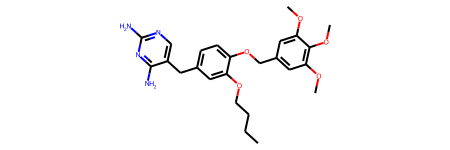

In [13]:
mol = bioactivity_df.molecule_chembl_id.values[0]
SMILES = bioactivity_df.canonical_smiles[bioactivity_df.molecule_chembl_id==mol].values[0]
fingerprint = np.array(fingerprint_df[fingerprint_df.Name==mol])[0][1:]

print(f'Three representations of molecule {mol}:')
print('1. SMILES notation:', SMILES)
print('2. Chemical fingerprint:', fingerprint)
print('3. Molecular Visualization')
Chem.MolFromSmiles(SMILES) #an example molecule

<a id='Model'></a>
## 4. Modeling the chemical fingerprints

In this part, we use machine learning to determine the charchteristics of molecules with a high chance of being viable drug candidates.

A note on modeling: $R^2$ is the percent of the variance in [potency](https://en.wikipedia.org/wiki/Potency_(pharmacology)) (as measured by $pIC_{50}$) is explained by the chemical fingerprint of the molecule.

In [14]:
# Modeling imports
from sklearn.metrics import mean_squared_error
from math import sqrt

# Regression models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [15]:
modeling_df, target = premodeling_processing(bioactivity_df, fingerprint_df)
modeling_df.head()

,molecule_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,468.554,4.016,2.000,9.000
1,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,468.554,4.016,2.000,9.000
2,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,468.554,4.016,2.000,9.000
3,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,468.554,4.016,2.000,9.000
4,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,468.554,4.016,2.000,9.000


In [16]:
target.bioactivity_class.value_counts()

ACTIVE          984
INTERMEDIATE    869
INACTIVE        433
Name: bioactivity_class, dtype: int64

In [44]:
reg_names = ['Random Forrest Regressor', 'Tweedies Regressor', 'Lasso Lars']
reg_types = [RandomForestRegressor(), TweedieRegressor(), LassoLars()]

cls_names = ['Decision Tree', 'Gaussian NB', 'Multinomial NB']
cls_types = [DecisionTreeClassifier(), GaussianNB(), MultinomialNB()]

In [45]:
model_obj = Modeling_class(modeling_df, target, reg_types, reg_names, cls_types, cls_names)

#### Regression:
Calculating baseline using dummy regressor

In [53]:
model_obj.model_scores_reg

[([RandomForestRegressor(),
   RandomForestRegressor(),
   RandomForestRegressor(),
   RandomForestRegressor(),
   RandomForestRegressor(),
   RandomForestRegressor(),
   RandomForestRegressor(),
   RandomForestRegressor(),
   RandomForestRegressor(),
   RandomForestRegressor()],
  {'fit_time': array([2.35415292, 1.68586302, 1.20621705, 1.14326191, 1.27734089,
          1.26139784, 1.63516402, 1.66078305, 1.3875649 , 1.33952212]),
   'score_time': array([0.02079511, 0.02041483, 0.01424694, 0.01414394, 0.0143702 ,
          0.02124715, 0.03062415, 0.01638198, 0.01803207, 0.01911187]),
   'estimator': [RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor()],
   'test_neg_root_mean_squared_error': array([-1.01527599, -0.99555749, -1.02212291, -0.92738896, -1.0306

In [55]:
model_obj.evaluaton_helpers('test_neg_root_mean_squared_error')

In [59]:
model_obj.reg_baseline_nrmse, model_obj.reg_baseline_r2

(1.035, 0.0)

In [19]:
X_data = model_obj.df

In [20]:
dr = DummyRegressor(strategy='mean').fit(X_data, target.pIC50) #Baseline
yhat_baseline = target.pIC50.mean()
yhat_baseline

y_pred = [yhat_baseline for i in range(len(target.pIC50))]
rmse = sqrt(mean_squared_error(target.pIC50, y_pred))

In [21]:
#Evaluation
print(f'Baseline R^2: {round(dr.score(X_data, target.pIC50),3)}\nBaseline RMSE: {round(rmse, 3)}')

Baseline R^2: 0.0
Baseline RMSE: 1.035


Running actual regression modeling

In [22]:
model_obj.regression_modeling(splits = 3)

Have not run scaling method yet, running now...
All done! Moving on to modeling, this may take a while...
Modeling done! Average scores are abstract represntations of how well this model type did, not actual scores.


In [23]:
avg_metrics

avg_score
model                    metric                                
Random Forrest Regressor neg_root_mean_squared_error      0.974
                         r2                               0.106
Tweedies Regressor       neg_root_mean_squared_error      1.012
                         r2                               0.035
Lasso Lars               neg_root_mean_squared_error      1.031
                         r2                              -0.001

### Evaluation Visualizations:

In [24]:
model_obj.model_scores_reg

[([RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor()],
  {'fit_time': array([0.82095098, 0.80673814, 0.78191638]),
   'score_time': array([0.01591301, 0.01559591, 0.01955271]),
   'estimator': [RandomForestRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor()],
   'test_neg_root_mean_squared_error': array([-0.99588   , -0.95132245, -0.97589874]),
   'test_r2': array([0.10793146, 0.11278208, 0.09714604])}),
 ([TweedieRegressor(), TweedieRegressor(), TweedieRegressor()],
  {'fit_time': array([0.03226113, 0.03124118, 0.02768111]),
   'score_time': array([0.00935698, 0.00702286, 0.00598598]),
   'estimator': [TweedieRegressor(), TweedieRegressor(), TweedieRegressor()],
   'test_neg_root_mean_squared_error': array([-1.03695513, -0.98870538, -1.01105818]),
   'test_r2': array([0.03282708, 0.04168428, 0.03091853])}),
 ([LassoLars(), LassoLars(), LassoLars()],
  {'fit_time': array([0.03785515, 0.03217411, 0.02925587]),
   'score_time': array([0.00657201,

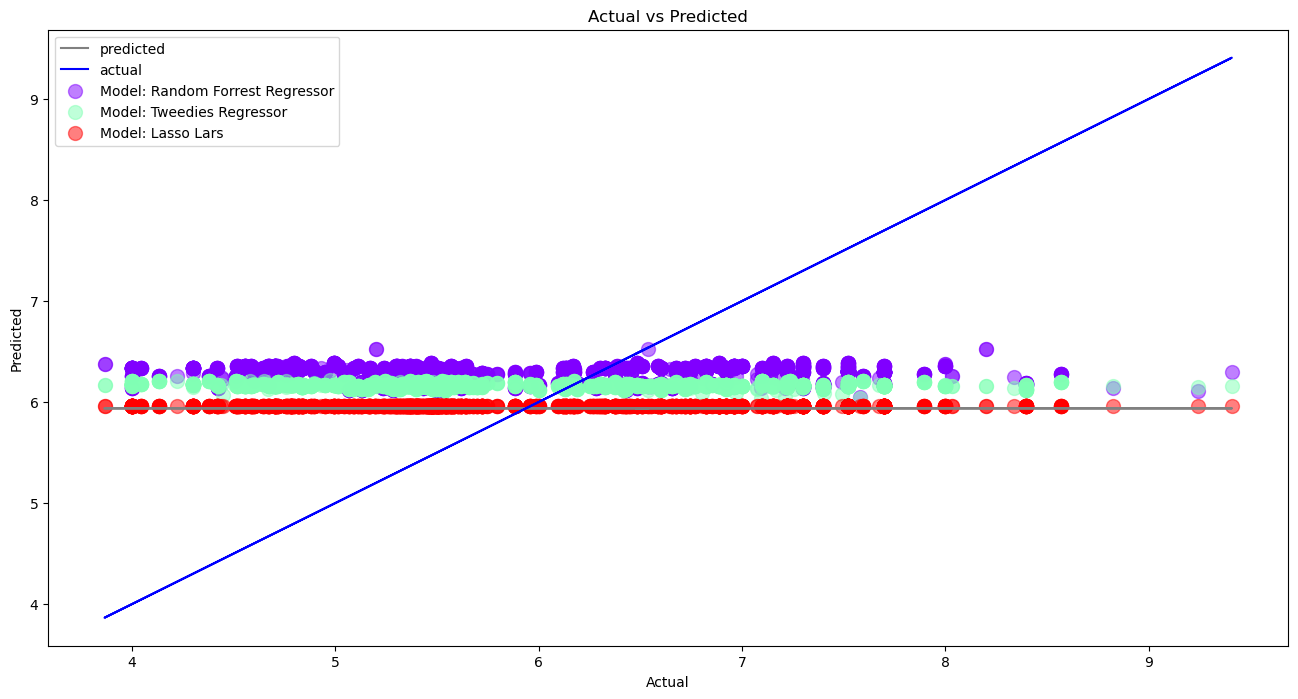

In [25]:
# This is broken, just like my brain after trying to make it work for an hour
# Just kidding, never use linear regression or it will break EVERYTHING
model_obj.plot_actual_vs_pred()

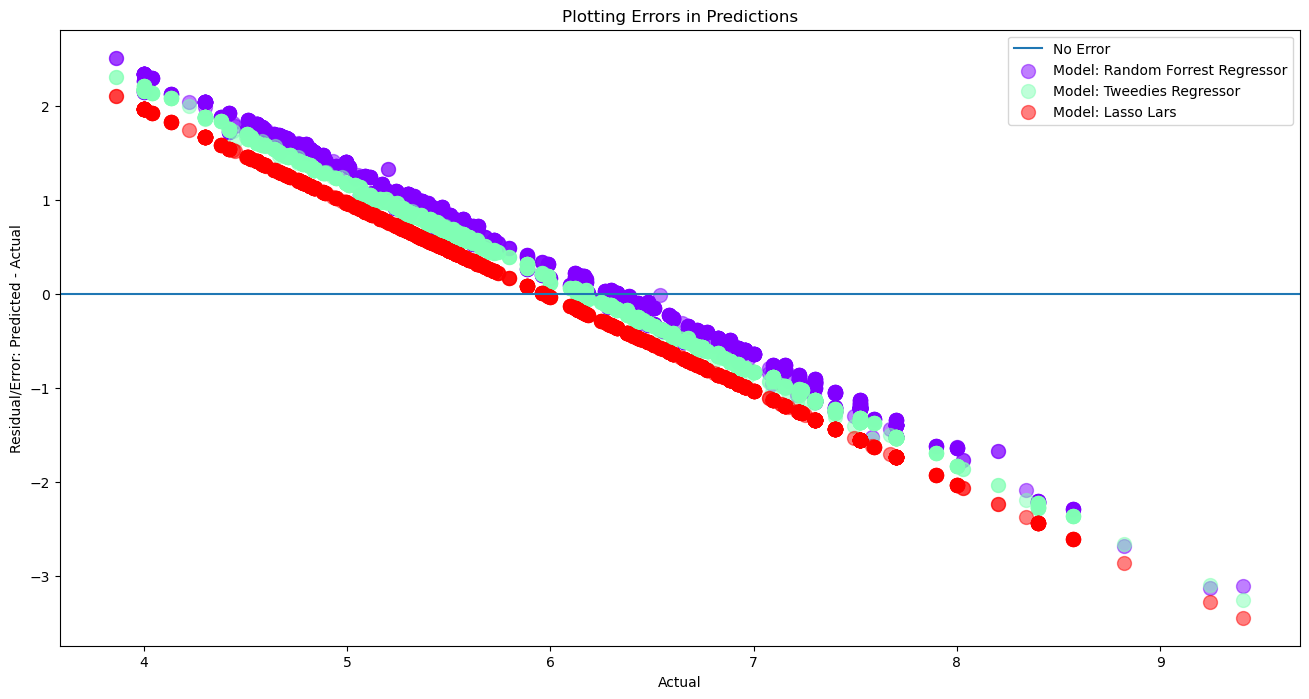

In [26]:
model_obj.plot_errors()

#### Classification:
Calculating baseline using most common mean.

In [27]:
# Mode in bioactivity class
print(f'Most common class label: {target.bioactivity_class.value_counts().index[0]}\nEncoded label as: {target.encoded_bac.value_counts().index[0]}')

Most common class label: ACTIVE
Encoded label as: 0


In [60]:
model_obj.cls_baseline_acc

43.0

In [28]:
dc = DummyClassifier(strategy='most_frequent').fit(X_data, target.encoded_bac) #Baseline
#Evaluation
print(f'Baseline Accuracy: {round(dc.score(X_data, target.encoded_bac),3) * 100}%')

Baseline Accuracy: 43.0%


In [29]:
model_obj.classification_modeling()

Scaling has already been run. Moving on to modeling, this may take a while...


,model,average_accuracy%
0,Decision Tree,58.980
2,Multinomial NB,43.350
1,Gaussian NB,37.690


### Out-of-sample testing:

In [40]:
mdl = model_obj.cls_test()

Best model: DecisionTreeClassifier()
Validate score: 59.440000000000005%
Test Score: 57.49999999999999%


In [43]:
model_obj.reg_test('neg_root_mean_squared_error')

Metric used: neg_root_mean_squared_error
Best model: RandomForestRegressor()
Validate score: -0.9513224452991095
Test Score: -31.604218469919488


RandomForestRegressor()